In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import math, time, random, datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train=pd.read_csv('titanic train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


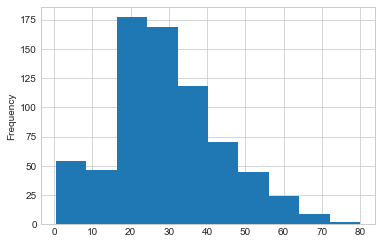

In [4]:
train.Age.plot.hist()

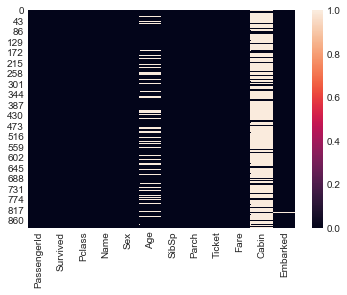

In [5]:
sns.heatmap(train.isnull())

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Here, 0=Not survived          1=Survived


0    549
1    342
Name: Survived, dtype: int64


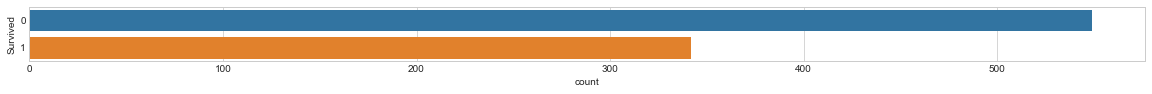

In [8]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

## Feature: Pclass
Description: The ticket class of the passenger.

Key: 1 = 1st, 2 = 2nd, 3 = 3rd

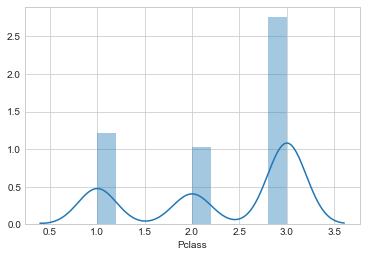

In [9]:
sns.distplot(train.Pclass)

male      577
female    314
Name: Sex, dtype: int64


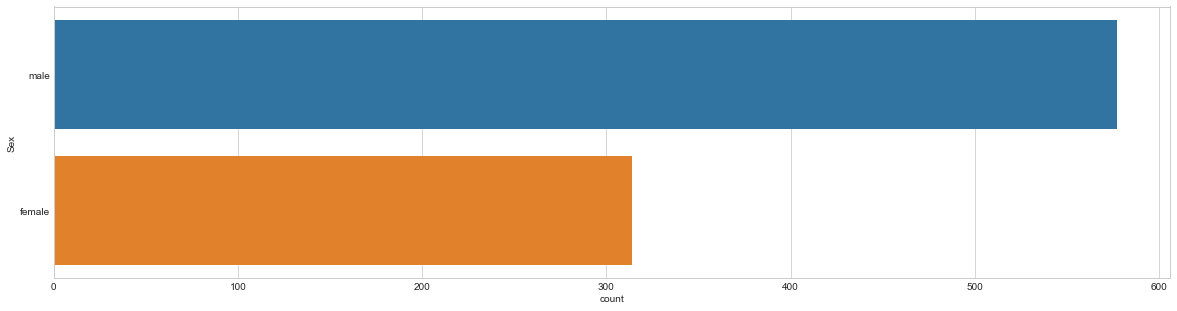

In [10]:
plt.figure(figsize=(20,5))
sns.countplot(y='Sex',data=train)
print(train.Sex.value_counts())

In [11]:
train['Sex']=np.where(train['Sex']=='female',1,0)
## We have changed sex from male female to 0 and 1

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


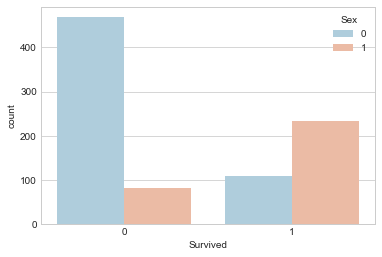

In [13]:
#plt.figure(figsize=(10,10))
sns.countplot(x='Survived',hue='Sex',data=train, palette='RdBu_r' )

In [14]:
train.Age.isnull().sum()

177

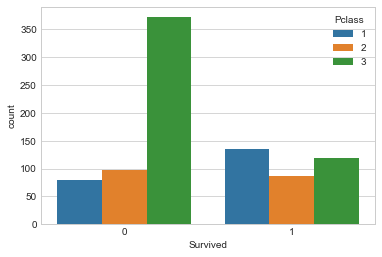

In [15]:
sns.countplot(x='Survived',data=train,hue='Pclass')

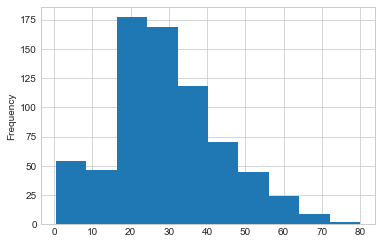

In [16]:
train.Age.plot.hist()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

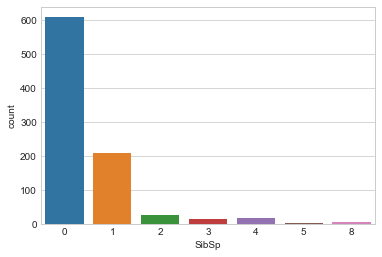

In [17]:
sns.countplot(x='SibSp',data=train)
train.SibSp.value_counts()

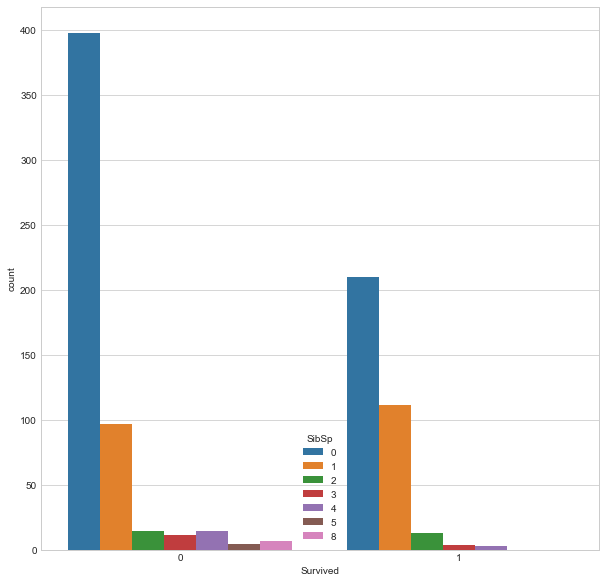

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(x='Survived',hue='SibSp',data=train)


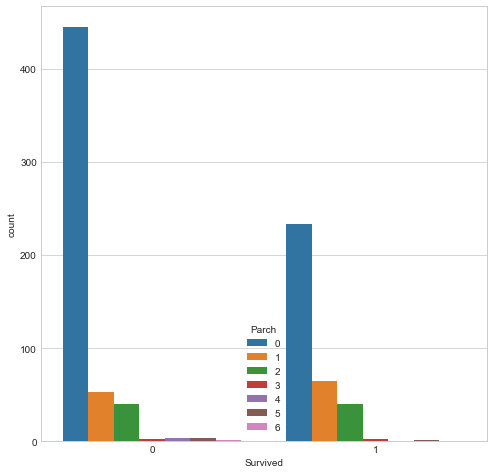

In [19]:
plt.figure(figsize=(8,8))
sns.countplot('Survived',hue='Parch',data=train)
#parch=parent children

In [20]:
train['Fare_bin']=pd.cut(train['Fare'],bins=5)

In [21]:
train.Fare_bin.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare_bin, dtype: int64

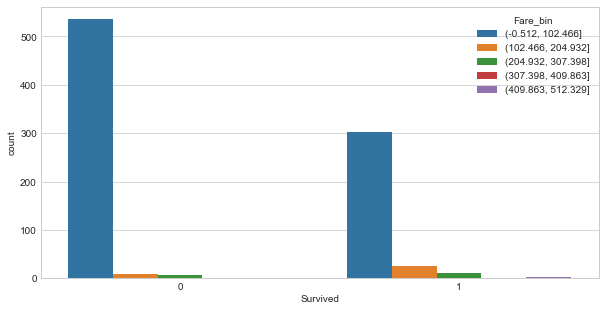

In [22]:
plt.figure(figsize=(10,5))
sns.countplot('Survived',hue='Fare_bin',data=train)

## Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [23]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

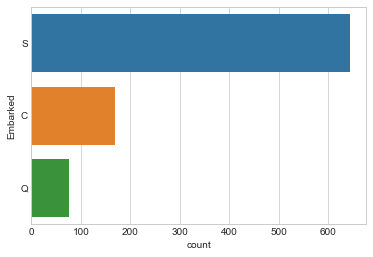

In [24]:
sns.countplot(y='Embarked',data=train)
train.Embarked.value_counts()

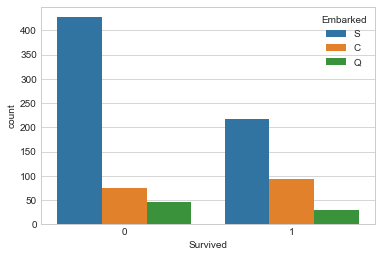

In [25]:
sns.countplot('Survived',hue='Embarked',data=train)

In [26]:
print(len(train.Embarked))
train=train.dropna(subset=['Embarked'])


891


In [27]:
train.Embarked.isnull().sum()

0

In [28]:
print(len(train.Embarked))

889


In [29]:
dis_cont=train[['Survived','Pclass','Sex','SibSp','Parch','Fare','Embarked']]
# we have separated our discrete continous features (means features having catagory isnside )
# for eg survived 0 and 1 sex male and female ,Embarked s,c,q

In [30]:
dis_cont.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,S
1,1,1,1,1,0,71.2833,C
2,1,3,1,0,0,7.9250,S
3,1,1,1,1,0,53.1000,S
4,0,3,0,0,0,8.0500,S


In [31]:
#one_hot_cols = dis_cont.columns.tolist()
#one_hot_cols.remove('Survived')
#dis_cont = pd.get_dummies(dis_cont, columns=one_hot_cols)

#dis_cont.head()

In [32]:
df_embarked_one_hot = pd.get_dummies(dis_cont['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(dis_cont['Sex'], 
                                prefix='Sex')

df_plcass_one_hot = pd.get_dummies(dis_cont['Pclass'], 
                                   prefix='pclass')

In [33]:
#Now, we are combining one hot encoded with disc_cont 
disc_cont_enc=pd.concat([dis_cont,
                    df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot],axis=1)

disc_cont_enc = disc_cont_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)


In [34]:
disc_cont_enc.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,Sex_0,Sex_1,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,1,0,0,0,1
1,1,1,0,71.2833,1,0,0,0,1,1,0,0
2,1,0,0,7.9250,0,0,1,0,1,0,0,1
3,1,1,0,53.1000,0,0,1,0,1,1,0,0
4,0,0,0,8.0500,0,0,1,1,0,0,0,1


## Start Building Machine Learning Models

Now our data has been manipulating and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

### Fixing the age feature first

In [35]:
train.Age.isnull().sum()

177

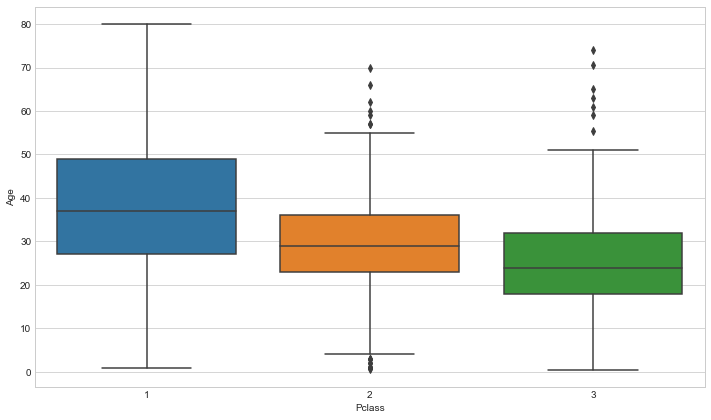

In [36]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [37]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 28
        else:
            return 24
    else:
        return Age
    

In [38]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)


In [39]:
train.Age.isnull().sum()

0

In [40]:
train['Age_bin']=pd.cut(train['Age'],bins=5)

In [41]:
train.Age_bin.value_counts()

(16.336, 32.252]    493
(32.252, 48.168]    217
(0.34, 16.336]      100
(48.168, 64.084]     68
(64.084, 80.0]       11
Name: Age_bin, dtype: int64

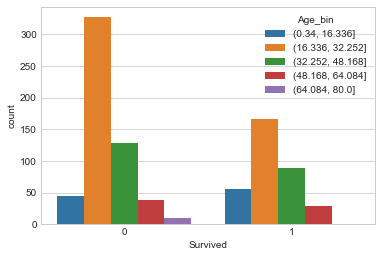

In [42]:
sns.countplot(x='Survived',hue='Age_bin',data=train)
## not much insights from this graph

In [43]:
disc_cont_enc['Age']=train.Age
disc_cont_enc.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,Sex_0,Sex_1,pclass_1,pclass_2,pclass_3,Age
0,0,1,0,7.2500,0,0,1,1,0,0,0,1,22.0
1,1,1,0,71.2833,1,0,0,0,1,1,0,0,38.0
2,1,0,0,7.9250,0,0,1,0,1,0,0,1,26.0
3,1,1,0,53.1000,0,0,1,0,1,1,0,0,35.0
4,0,0,0,8.0500,0,0,1,1,0,0,0,1,35.0


In [44]:
selected_df=disc_cont_enc
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,Sex_0,Sex_1,pclass_1,pclass_2,pclass_3,Age
0,0,1,0,7.2500,0,0,1,1,0,0,0,1,22.0
1,1,1,0,71.2833,1,0,0,0,1,1,0,0,38.0
2,1,0,0,7.9250,0,0,1,0,1,0,0,1,26.0
3,1,1,0,53.1000,0,0,1,0,1,1,0,0,35.0
4,0,0,0,8.0500,0,0,1,1,0,0,0,1,35.0


In [45]:
selected_df.isnull().sum()

Survived      0
SibSp         0
Parch         0
Fare          0
embarked_C    0
embarked_Q    0
embarked_S    0
Sex_0         0
Sex_1         0
pclass_1      0
pclass_2      0
pclass_3      0
Age           0
dtype: int64

In [46]:
X_train=selected_df.drop('Survived',axis=1)
y_train=selected_df.Survived

In [47]:
print(X_train.shape)
print(y_train.shape)

(889, 12)
(889,)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.3,random_state=1)


In [49]:
model_Lr=LogisticRegression()
model_Lr.fit(X_train,y_train)
model_Lr.score(X_test,y_test)

0.8352059925093633

In [50]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(LogisticRegression(),selected_df,selected_df.Survived,cv=5)
np.average(score)

1.0

In [51]:
pred=model_Lr.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y_test,pred)
accuracy

array([[144,  22],
       [ 22,  79]], dtype=int64)